In [3]:
#dependencies
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [4]:
df = pd.read_csv('Parkinsson disease.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#shape of data
df.shape

(195, 24)

In [6]:
#columns that I will keep
columns_to_retain = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE', 'status']

#after droping unnecessary columns, new dataset
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

#drop the rows with missing values
df = df.dropna(axis=0)

In [7]:
#transform the non-numeric data in the columns into number
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#after cleaning the dataset(Here, htn value 1 means yes. But classification value 0 means disease detected)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
#splitting the dataset into independant (x) data set for the features and dependant (y) dataset for the target
x = df.drop(['status'], axis=1)
y = df['status']

In [10]:
#scaling the dataset to bring all the values between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [11]:
#split data into train, test and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [12]:
#building model
model = Sequential()
model.add(Dense(256, input_dim = len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [13]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
#train the model
history = model.fit(x_train, y_train, epochs = 1000, batch_size = x_train.shape[0])

Epoch 1/1000
156/156 [==============================] - 0s 903us/step - loss: 0.6826 - accuracy: 0.7372
Epoch 2/1000
156/156 [==============================] - 0s 53us/step - loss: 0.6633 - accuracy: 0.7692
Epoch 3/1000
156/156 [==============================] - 0s 13us/step - loss: 0.6450 - accuracy: 0.7692
Epoch 4/1000
156/156 [==============================] - 0s 13us/step - loss: 0.6274 - accuracy: 0.7692
Epoch 5/1000
156/156 [==============================] - 0s 13us/step - loss: 0.6106 - accuracy: 0.7692
Epoch 6/1000
156/156 [==============================] - 0s 13us/step - loss: 0.5945 - accuracy: 0.7692
Epoch 7/1000
156/156 [==============================] - 0s 13us/step - loss: 0.5791 - accuracy: 0.7692
Epoch 8/1000
156/156 [==============================] - 0s 6us/step - loss: 0.5644 - accuracy: 0.7692
Epoch 9/1000
156/156 [==============================] - 0s 13us/step - loss: 0.5504 - accuracy: 0.7692
Epoch 10/1000
156/156 [==============================] - 0s 13us/step - l

Epoch 81/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2933 - accuracy: 0.8590
Epoch 82/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2923 - accuracy: 0.8590
Epoch 83/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2912 - accuracy: 0.8654
Epoch 84/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2902 - accuracy: 0.8654
Epoch 85/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2892 - accuracy: 0.8654
Epoch 86/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2882 - accuracy: 0.8654
Epoch 87/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2872 - accuracy: 0.8654
Epoch 88/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2862 - accuracy: 0.8590
Epoch 89/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2852 - accuracy: 0.8590
Epoch 90/1000
156/156 [==============================] - 0s 13us/st

Epoch 160/1000
156/156 [==============================] - 0s 19us/step - loss: 0.2339 - accuracy: 0.8718
Epoch 161/1000
156/156 [==============================] - 0s 12us/step - loss: 0.2334 - accuracy: 0.8718
Epoch 162/1000
156/156 [==============================] - 0s 12us/step - loss: 0.2330 - accuracy: 0.8718
Epoch 163/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2325 - accuracy: 0.8718
Epoch 164/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2321 - accuracy: 0.8718
Epoch 165/1000
156/156 [==============================] - 0s 12us/step - loss: 0.2317 - accuracy: 0.8718
Epoch 166/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2313 - accuracy: 0.8718
Epoch 167/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2308 - accuracy: 0.8718
Epoch 168/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2304 - accuracy: 0.8718
Epoch 169/1000
156/156 [==============================] 

Epoch 239/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2034 - accuracy: 0.8910
Epoch 240/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2030 - accuracy: 0.8910
Epoch 241/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2027 - accuracy: 0.8910
Epoch 242/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2023 - accuracy: 0.8846
Epoch 243/1000
156/156 [==============================] - 0s 19us/step - loss: 0.2020 - accuracy: 0.8846
Epoch 244/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2016 - accuracy: 0.8910
Epoch 245/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2013 - accuracy: 0.8910
Epoch 246/1000
156/156 [==============================] - 0s 6us/step - loss: 0.2009 - accuracy: 0.8910
Epoch 247/1000
156/156 [==============================] - 0s 13us/step - loss: 0.2006 - accuracy: 0.8910
Epoch 248/1000
156/156 [==============================] -

Epoch 318/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1773 - accuracy: 0.9038
Epoch 319/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1770 - accuracy: 0.9038
Epoch 320/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1767 - accuracy: 0.9038
Epoch 321/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1764 - accuracy: 0.9038
Epoch 322/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1761 - accuracy: 0.9038
Epoch 323/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1758 - accuracy: 0.9038
Epoch 324/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1755 - accuracy: 0.9038
Epoch 325/1000
156/156 [==============================] - 0s 12us/step - loss: 0.1752 - accuracy: 0.9038
Epoch 326/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1749 - accuracy: 0.9038
Epoch 327/1000
156/156 [==============================] -

Epoch 397/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1548 - accuracy: 0.8974
Epoch 398/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1545 - accuracy: 0.8974
Epoch 399/1000
156/156 [==============================] - 0s 12us/step - loss: 0.1542 - accuracy: 0.8974
Epoch 400/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1540 - accuracy: 0.8974
Epoch 401/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1537 - accuracy: 0.8974
Epoch 402/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1534 - accuracy: 0.9038
Epoch 403/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1532 - accuracy: 0.9038
Epoch 404/1000
156/156 [==============================] - 0s 19us/step - loss: 0.1529 - accuracy: 0.9038
Epoch 405/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1527 - accuracy: 0.9038
Epoch 406/1000
156/156 [==============================] -

Epoch 476/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1347 - accuracy: 0.9359
Epoch 477/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1344 - accuracy: 0.9359
Epoch 478/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1342 - accuracy: 0.9359
Epoch 479/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1339 - accuracy: 0.9359
Epoch 480/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1337 - accuracy: 0.9359
Epoch 481/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1334 - accuracy: 0.9359
Epoch 482/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1332 - accuracy: 0.9359
Epoch 483/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1329 - accuracy: 0.9359
Epoch 484/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1327 - accuracy: 0.9359
Epoch 485/1000
156/156 [==============================] - 

Epoch 555/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1164 - accuracy: 0.9359
Epoch 556/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1162 - accuracy: 0.9359
Epoch 557/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1161 - accuracy: 0.9359
Epoch 558/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1159 - accuracy: 0.9359
Epoch 559/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1157 - accuracy: 0.9359
Epoch 560/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1155 - accuracy: 0.9359
Epoch 561/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1153 - accuracy: 0.9359
Epoch 562/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1150 - accuracy: 0.9359
Epoch 563/1000
156/156 [==============================] - 0s 7us/step - loss: 0.1149 - accuracy: 0.9487
Epoch 564/1000
156/156 [==============================] - 

Epoch 634/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1015 - accuracy: 0.9487
Epoch 635/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1013 - accuracy: 0.9487
Epoch 636/1000
156/156 [==============================] - 0s 19us/step - loss: 0.1011 - accuracy: 0.9487
Epoch 637/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1010 - accuracy: 0.9487
Epoch 638/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1008 - accuracy: 0.9487
Epoch 639/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1006 - accuracy: 0.9487
Epoch 640/1000
156/156 [==============================] - 0s 6us/step - loss: 0.1004 - accuracy: 0.9487
Epoch 641/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1003 - accuracy: 0.9487
Epoch 642/1000
156/156 [==============================] - 0s 13us/step - loss: 0.1001 - accuracy: 0.9487
Epoch 643/1000
156/156 [==============================] - 0

Epoch 713/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0890 - accuracy: 0.9615
Epoch 714/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0889 - accuracy: 0.9615
Epoch 715/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0887 - accuracy: 0.9615
Epoch 716/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0886 - accuracy: 0.9615
Epoch 717/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0884 - accuracy: 0.9615
Epoch 718/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0883 - accuracy: 0.9615
Epoch 719/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0881 - accuracy: 0.9615
Epoch 720/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0880 - accuracy: 0.9615
Epoch 721/1000
156/156 [==============================] - 0s 12us/step - loss: 0.0878 - accuracy: 0.9615
Epoch 722/1000
156/156 [==============================] -

Epoch 792/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0785 - accuracy: 0.9744
Epoch 793/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0784 - accuracy: 0.9744
Epoch 794/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0783 - accuracy: 0.9744
Epoch 795/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0782 - accuracy: 0.9744
Epoch 796/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0781 - accuracy: 0.9744
Epoch 797/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0780 - accuracy: 0.9744
Epoch 798/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0779 - accuracy: 0.9744
Epoch 799/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0777 - accuracy: 0.9744
Epoch 800/1000
156/156 [==============================] - 0s 19us/step - loss: 0.0776 - accuracy: 0.9744
Epoch 801/1000
156/156 [==============================]

Epoch 871/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0707 - accuracy: 0.9744
Epoch 872/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0706 - accuracy: 0.9744
Epoch 873/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0705 - accuracy: 0.9744
Epoch 874/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0704 - accuracy: 0.9744
Epoch 875/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0703 - accuracy: 0.9744
Epoch 876/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0702 - accuracy: 0.9744
Epoch 877/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0701 - accuracy: 0.9744
Epoch 878/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0700 - accuracy: 0.9744
Epoch 879/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0699 - accuracy: 0.9744
Epoch 880/1000
156/156 [==============================] - 0

Epoch 950/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0635 - accuracy: 0.9744
Epoch 951/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0633 - accuracy: 0.9744
Epoch 952/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0632 - accuracy: 0.9744
Epoch 953/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0631 - accuracy: 0.9744
Epoch 954/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0630 - accuracy: 0.9744
Epoch 955/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0629 - accuracy: 0.9744
Epoch 956/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0628 - accuracy: 0.9744
Epoch 957/1000
156/156 [==============================] - 0s 13us/step - loss: 0.0627 - accuracy: 0.9744
Epoch 958/1000
156/156 [==============================] - 0s 6us/step - loss: 0.0627 - accuracy: 0.9744
Epoch 959/1000
156/156 [==============================] - 0s

In [15]:
#save the model
#model.save('ckd.model')

Text(0.5, 0, 'epoch')

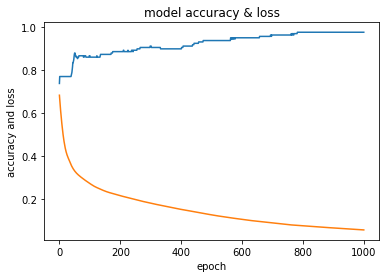

In [16]:
#visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [17]:
#Shape of training and testing data
print('shape of train data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of train data: (156, 22)
shape of test data: (39, 22)


In [18]:
#Showing the actual and predicted values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original: 1,0,1,0,0,1,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1
Predicted: 1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1
